In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the dataset from csv file and read through pandas.
iris = pd.read_csv('iris.csv', delimiter = ',')

In [38]:
# Examine the shape of the dataset: 150 rows, 5 columns.
iris.shape

(150, 5)

In [32]:
# Number of instances and how many attributes in the dataset. 
# Demonstrates a complete dataset - no null values.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [35]:
# Number of instances of each species shows a balanced dataset - each type is equally represented.
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [34]:
# Sample look at the dataset.
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
30,4.8,3.1,1.6,0.2,setosa
95,5.7,3.0,4.2,1.2,versicolor
119,6.0,2.2,5.0,1.5,virginica
3,4.6,3.1,1.5,0.2,setosa
113,5.7,2.5,5.0,2.0,virginica
83,6.0,2.7,5.1,1.6,versicolor
20,5.4,3.4,1.7,0.2,setosa
120,6.9,3.2,5.7,2.3,virginica
126,6.2,2.8,4.8,1.8,virginica
70,5.9,3.2,4.8,1.8,versicolor


In [36]:
# Mean values of each individual iris species and dataset as a whole.
sp_mean = iris.groupby('species').mean()
to_mean = iris.mean()
means = sp_mean.append(to_mean, ignore_index=True)
means.insert(0, 'species', ['setosa', 'versicolor', 'virginica', 'all_species'])
means

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006000,3.418,1.464000,0.244000
1,versicolor,5.936000,2.770,4.260000,1.326000
2,virginica,6.588000,2.974,5.552000,2.026000
3,all_species,5.843333,3.054,3.758667,1.198667


In [37]:
# Standard Deviation values of each individual iris species and dataset as a whole.
sp_std = iris.groupby('species').std()
to_std = iris.std()
std = sp_std.append(to_std, ignore_index=True)
std.insert(0, 'species', ['setosa', 'versicolor', 'virginica', 'all_species'])
std

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,0.352490,0.381024,0.173511,0.107210
1,versicolor,0.516171,0.313798,0.469911,0.197753
2,virginica,0.635880,0.322497,0.551895,0.274650
3,all_species,0.828066,0.433594,1.764420,0.763161


In [39]:
# Correlations between measurements.
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


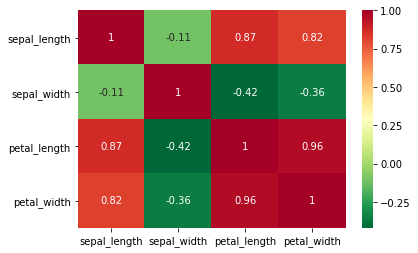

In [66]:
# Visualising correlations (heatmap)
# https://www.kaggle.com/kamrankausar/iris-dataset-ml-and-deep-learning-from-scratch
sns.heatmap(iris.corr(),annot=True,cmap='RdYlGn_r') 
plt.show()

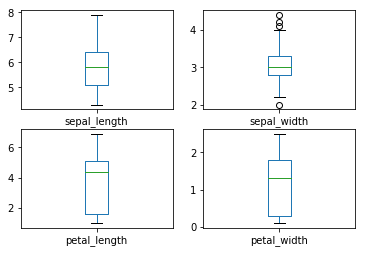

In [13]:
# Boxplot
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

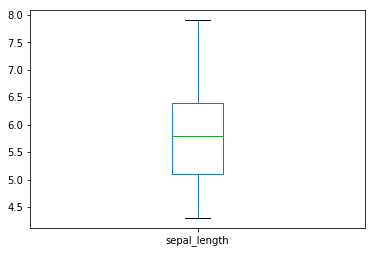

In [14]:
# Specific Boxplot
iris.sepal_length.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

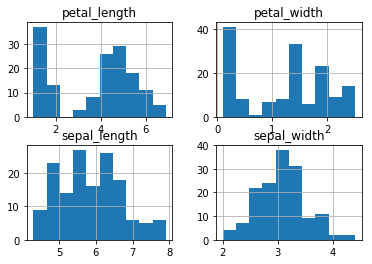

In [42]:
iris.hist()
plt.show()

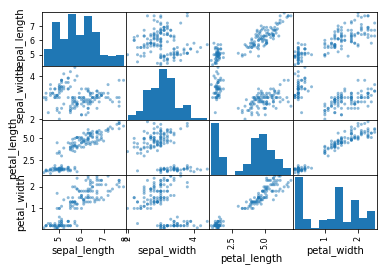

In [43]:
pd.plotting.scatter_matrix(iris)
plt.show()

In [44]:
import seaborn as sns

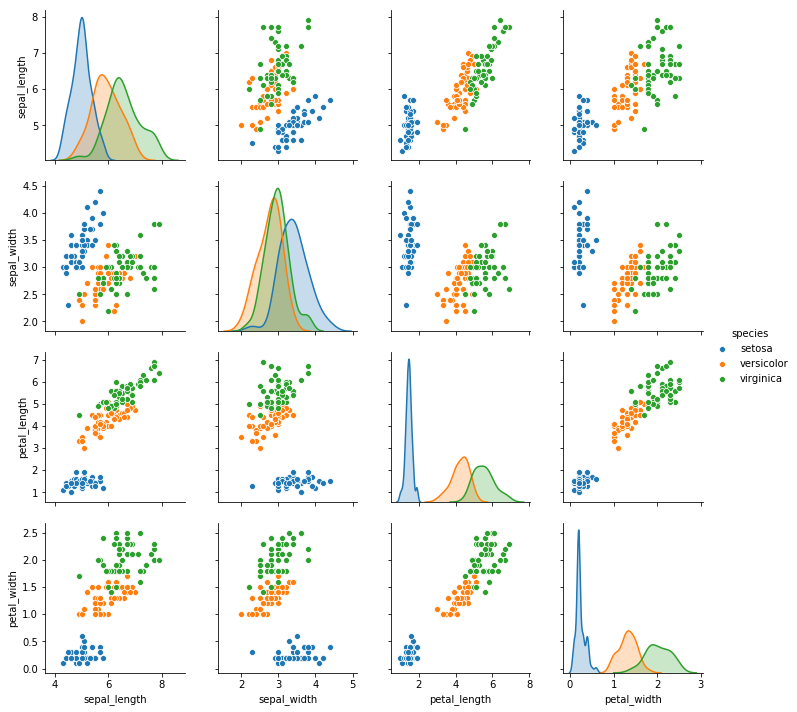

In [68]:
sns.pairplot(iris, # dataset 
             hue = 'species', # variable to plot with different colours
             height = 2.5, # height of each facet
             diag_kind = 'kde' ) # analyse continuoous variables
plt.show()

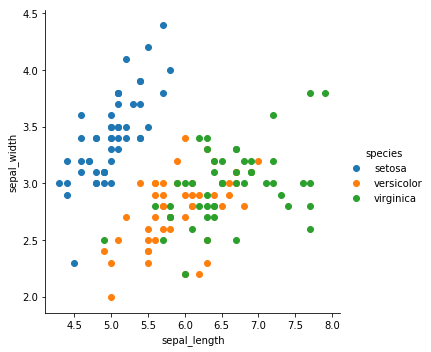

In [46]:
sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()
plt.show()

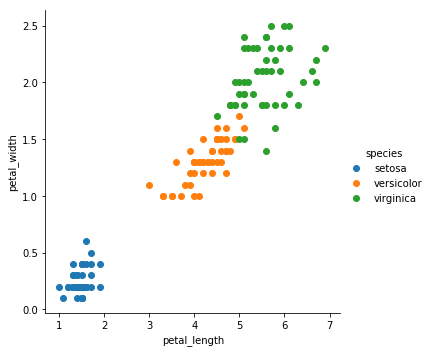

In [47]:
sns.FacetGrid(iris, hue = 'species', height=5).map(plt.scatter, 'petal_length', 'petal_width').add_legend()
plt.show()

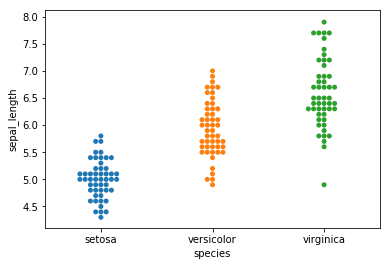

In [48]:
sns.swarmplot(x = 'species', y = 'sepal_length', data = iris)
plt.show()

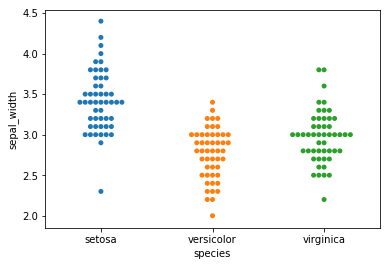

In [49]:
sns.swarmplot(x = 'species', y = 'sepal_width', data = iris)
plt.show()

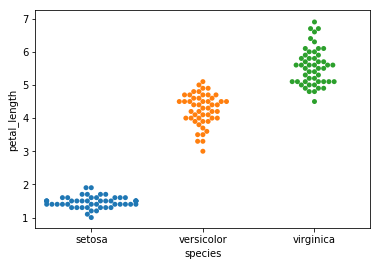

In [50]:
sns.swarmplot(x = 'species', y = 'petal_length', data = iris)
plt.show()

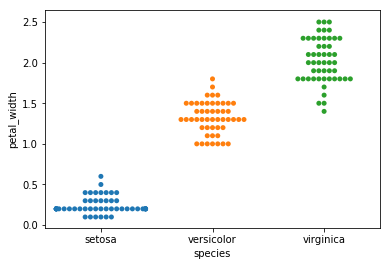

In [51]:
sns.swarmplot(x = 'species', y = 'petal_width', data = iris)
plt.show()

### Splitting the Dataset 
Below the dataset is split to explore each species individually.

In [52]:
# Maybe instead of splitting the dataset, we could use this:
iris[iris['species']=='versicolor'].describe()
# from https://www.kaggle.com/kamrankausar/iris-dataset-ml-and-deep-learning-from-scratch

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [53]:
setosa = iris.loc[0:49]
versicolor = iris.loc[50:99]
virginica = iris.loc[100:149]

### Setosa

In [54]:
setosa = iris.loc[0:49]
setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [55]:
setosa.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


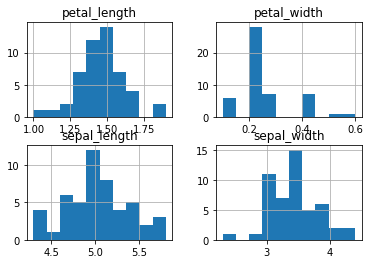

In [56]:
setosa.hist()
plt.show()

### Versicolor

In [57]:
versicolor = iris.loc[50:99]
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


### Virginica

In [58]:
virginica = iris.loc[100:149]
virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000
